Descriptive Statistics:
count    579485.000000
mean         73.174344
std          17.900532
min          43.000000
25%          59.000000
50%          70.000000
75%          84.000000
max         173.000000
Name: bpm, dtype: float64


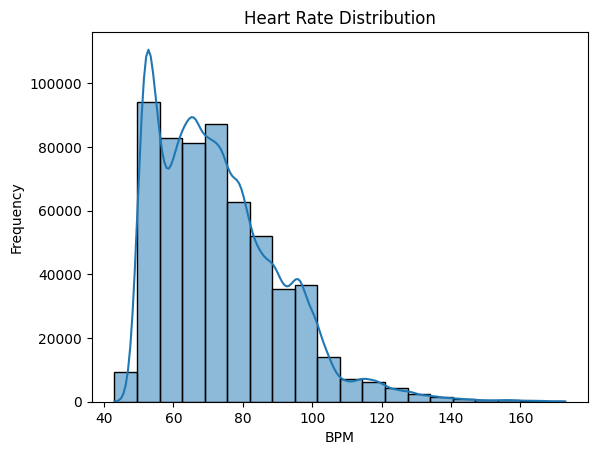

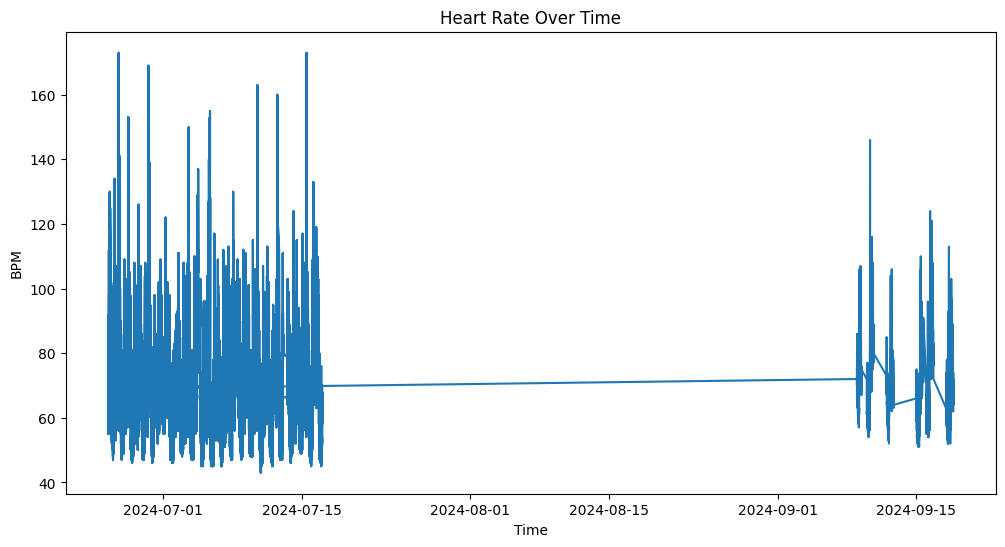

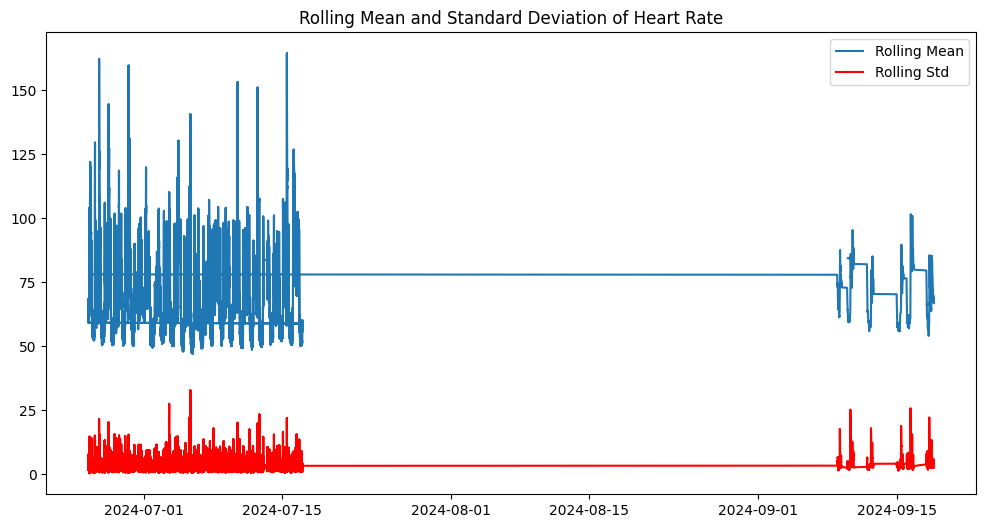

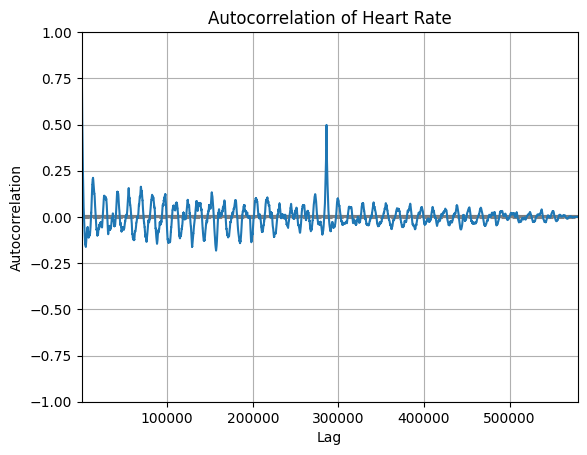

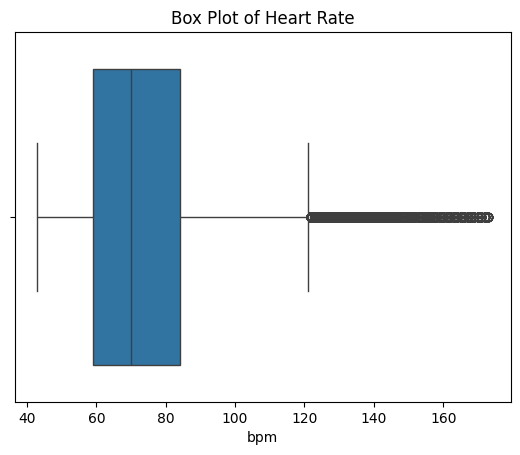

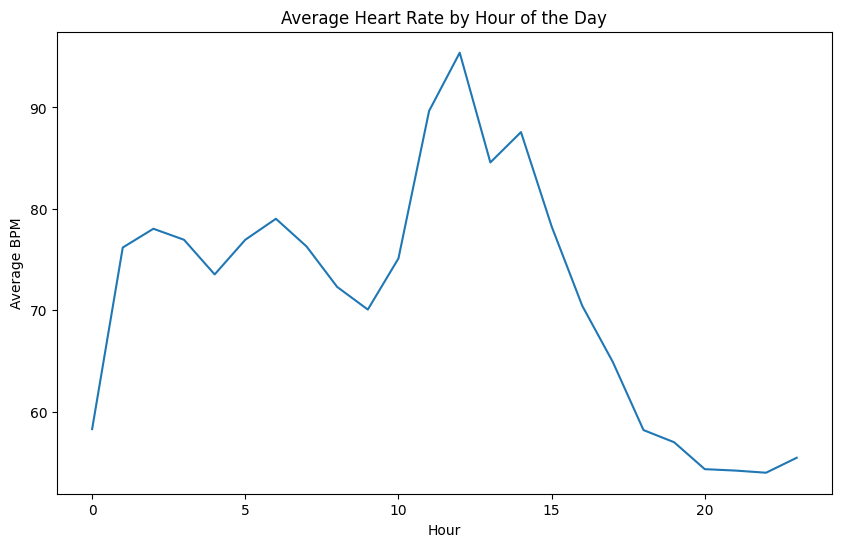

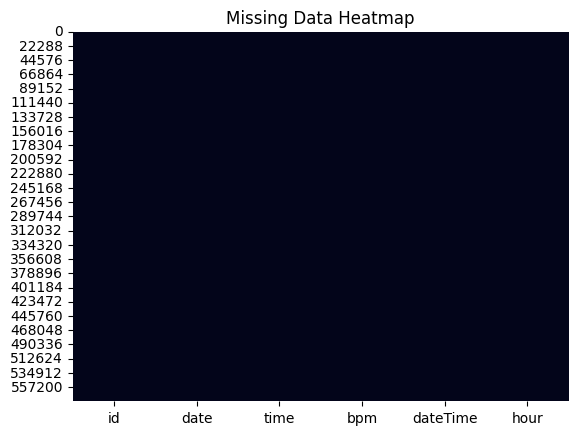

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
import pandas as pd

class DataUnderstanding:
    
    def descriptive_statistics(self, df):
        print("Descriptive Statistics:")
        print(df['bpm'].describe())

    def distribution_analysis(self, df):
        sns.histplot(df['bpm'], bins=20, kde=True)
        plt.title('Heart Rate Distribution')
        plt.xlabel('BPM')
        plt.ylabel('Frequency')
        plt.show()

    def time_series_analysis(self, df):
        # Combine date and time columns into dateTime if not already present
        if 'dateTime' not in df.columns:
            df['dateTime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))

        # Plot Heart Rate over Time
        plt.figure(figsize=(12, 6))
        plt.plot(df['dateTime'], df['bpm'])
        plt.title('Heart Rate Over Time')
        plt.xlabel('Time')
        plt.ylabel('BPM')
        plt.show()

        # Rolling Mean and Std (window size = 60 minutes or custom if needed)
        rolling_mean = df['bpm'].rolling(window=60).mean()
        rolling_std = df['bpm'].rolling(window=60).std()

        plt.figure(figsize=(12, 6))
        plt.plot(df['dateTime'], rolling_mean, label='Rolling Mean')
        plt.plot(df['dateTime'], rolling_std, label='Rolling Std', color='red')
        plt.title('Rolling Mean and Standard Deviation of Heart Rate')
        plt.legend()
        plt.show()

    def correlation_analysis(self, df):
        autocorrelation_plot(df['bpm'])
        plt.title('Autocorrelation of Heart Rate')
        plt.show()

    def outlier_detection(self, df):
        sns.boxplot(x=df['bpm'])
        plt.title('Box Plot of Heart Rate')
        plt.show()

    def seasonal_trend_analysis(self, df):
        if 'dateTime' not in df.columns:
            df['dateTime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))

        # Extract hour from the datetime column
        df['hour'] = df['dateTime'].dt.hour

        # Plot the average heart rate per hour of the day
        hourly_avg = df.groupby('hour')['bpm'].mean()

        plt.figure(figsize=(10, 6))
        hourly_avg.plot()
        plt.title('Average Heart Rate by Hour of the Day')
        plt.xlabel('Hour')
        plt.ylabel('Average BPM')
        plt.show()

    def missing_data_analysis(self, df):
        sns.heatmap(df.isnull(), cbar=False)
        plt.title('Missing Data Heatmap')
        plt.show()

    def confidence_level_analysis(self, df):
        if 'confidence' in df.columns:
            sns.histplot(df['confidence'], bins=10)
            plt.title('Distribution of Confidence Levels')
            plt.xlabel('Confidence')
            plt.ylabel('Frequency')
            plt.show()
        else:
            print("The 'confidence' column is missing from the DataFrame. Skipping confidence level analysis.")

# Example of how to use the class
if __name__ == "__main__":
    understanding = DataUnderstanding()
    
    # Load your CSV file (same path as in previous examples)
    csv_path = 'E:\\chatbot-01\\datasets\\hr\\heart_rate_data.csv'
    df = pd.read_csv(csv_path)

    # Ensure datetime is created for relevant methods
    df['dateTime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

    # Apply different analyses
    understanding.descriptive_statistics(df)
    understanding.distribution_analysis(df)
    understanding.time_series_analysis(df)
    understanding.correlation_analysis(df)
    understanding.outlier_detection(df)
    understanding.seasonal_trend_analysis(df)
    understanding.missing_data_analysis(df)


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from datetime import datetime
import warnings

# Turn off warnings
warnings.filterwarnings("ignore")

class DataPreprocessing:

    # Load data from the CSV file
    def load_data(self, csv_file_path):
        # Load the CSV data
        df = pd.read_csv(csv_file_path)

        # Combine 'date' and 'time' columns into a 'dateTime' column
        df['dateTime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%m/%d/%Y %H:%M:%S')

        # Ensure necessary columns exist
        if not {'id', 'bpm', 'dateTime'}.issubset(df.columns):
            raise KeyError("The necessary fields are missing in the CSV data.")
        
        return df

    def filter_by_bpm(self, df, bpm_threshold=50):
        # Filter based on BPM threshold
        df = df[df['bpm'] >= bpm_threshold].reset_index(drop=True)
        return df

    def sort_data(self, df):
        # Sort by 'dateTime'
        df = df.sort_values('dateTime').reset_index(drop=True)
        return df

    def check_time_interval(self, df, expected_interval_seconds=5):
        # Check if the time difference between rows matches the expected interval
        df['time_diff'] = df['dateTime'].diff().dt.total_seconds()
        inconsistent = df[df['time_diff'] != expected_interval_seconds]

        if not inconsistent.empty:
            print("Inconsistent time intervals found:")
            print(inconsistent[['dateTime', 'time_diff']])
        else:
            print("All time intervals are consistent.")

        df.drop('time_diff', axis=1, inplace=True)
        return df

    def handle_missing_values(self, df):
        # Forward-fill missing BPM values
        df['bpm'].fillna(method='ffill', inplace=True)
        return df

    def remove_outliers(self, df, z_threshold=3):
        # Remove outliers based on Z-score
        df['z_score'] = np.abs(stats.zscore(df['bpm']))
        df = df[df['z_score'] < z_threshold].reset_index(drop=True)
        df.drop('z_score', axis=1, inplace=True)
        return df

    def remove_noise(self, df, window_size=3):
        # Smooth the BPM data with a rolling window
        df['bpm'] = df['bpm'].rolling(window=window_size, center=True).mean()
        df['bpm'].fillna(method='bfill', inplace=True)
        df['bpm'].fillna(method='ffill', inplace=True)
        return df

    def normalize_data(self, df):
        # Normalize the BPM values using MinMaxScaler
        scaler = MinMaxScaler(feature_range=(0, 1))
        df['bpm_normalized'] = scaler.fit_transform(df['bpm'].values.reshape(-1, 1))
        return df, scaler

# Example of how to use the class
if __name__ == "__main__":
    preprocessing = DataPreprocessing()
    
    # Load your CSV file
    csv_path = 'E:\\chatbot-01\\datasets\\hr\\heart_rate_data.csv'
    df = preprocessing.load_data(csv_path)
    
    # Apply preprocessing steps
    df = preprocessing.filter_by_bpm(df)
    df = preprocessing.sort_data(df)
    df = preprocessing.check_time_interval(df)
    df = preprocessing.remove_outliers(df)
    df = preprocessing.remove_noise(df)
    df, scaler = preprocessing.normalize_data(df)

    # Now df contains the processed data
    print(df.head())


Inconsistent time intervals found:
                  dateTime  time_diff
0      2024-06-25 10:10:15        NaN
1      2024-06-25 10:10:15        0.0
2      2024-06-25 10:10:15        0.0
4      2024-06-25 10:10:20        0.0
5      2024-06-25 10:10:20        0.0
...                    ...        ...
570084 2024-09-18 18:02:00       60.0
570085 2024-09-18 18:03:00       60.0
570086 2024-09-18 18:04:00       60.0
570087 2024-09-18 18:05:00       60.0
570088 2024-09-18 18:06:00       60.0

[417870 rows x 2 columns]
       id       date      time        bpm            dateTime  bpm_normalized
0       1  6/25/2024  10:10:15  73.000000 2024-06-25 10:10:15        0.302632
1  572217  6/25/2024  10:10:15  73.000000 2024-06-25 10:10:15        0.302632
2  286109  6/25/2024  10:10:15  72.333333 2024-06-25 10:10:15        0.293860
3  286110  6/25/2024  10:10:20  71.666667 2024-06-25 10:10:20        0.285088
4  572218  6/25/2024  10:10:20  71.000000 2024-06-25 10:10:20        0.276316


C:\Users\thinkpad\AppData\Local\Temp\ipykernel_12956\3225799981.py:122: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bpm'].fillna(method='bfill', inplace=True)
C:\Users\thinkpad\AppData\Local\Temp\ipykernel_12956\3225799981.py:122: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['bpm'].fillna(method='bfill', inplace=True)
C:\Users\thinkpad\AppData\Local\Temp\ipykernel_12956\3225799981.py:123: FutureWarning: A value is trying to be se

Reloading Tuner from .\untitled_project\tuner0.json



e:\chatbot-01\python-backend\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
e:\chatbot-01\python-backend\venv\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3522/3522 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step
Model Evaluation Metrics:
MSE: 0.2893
MAE: 0.3255


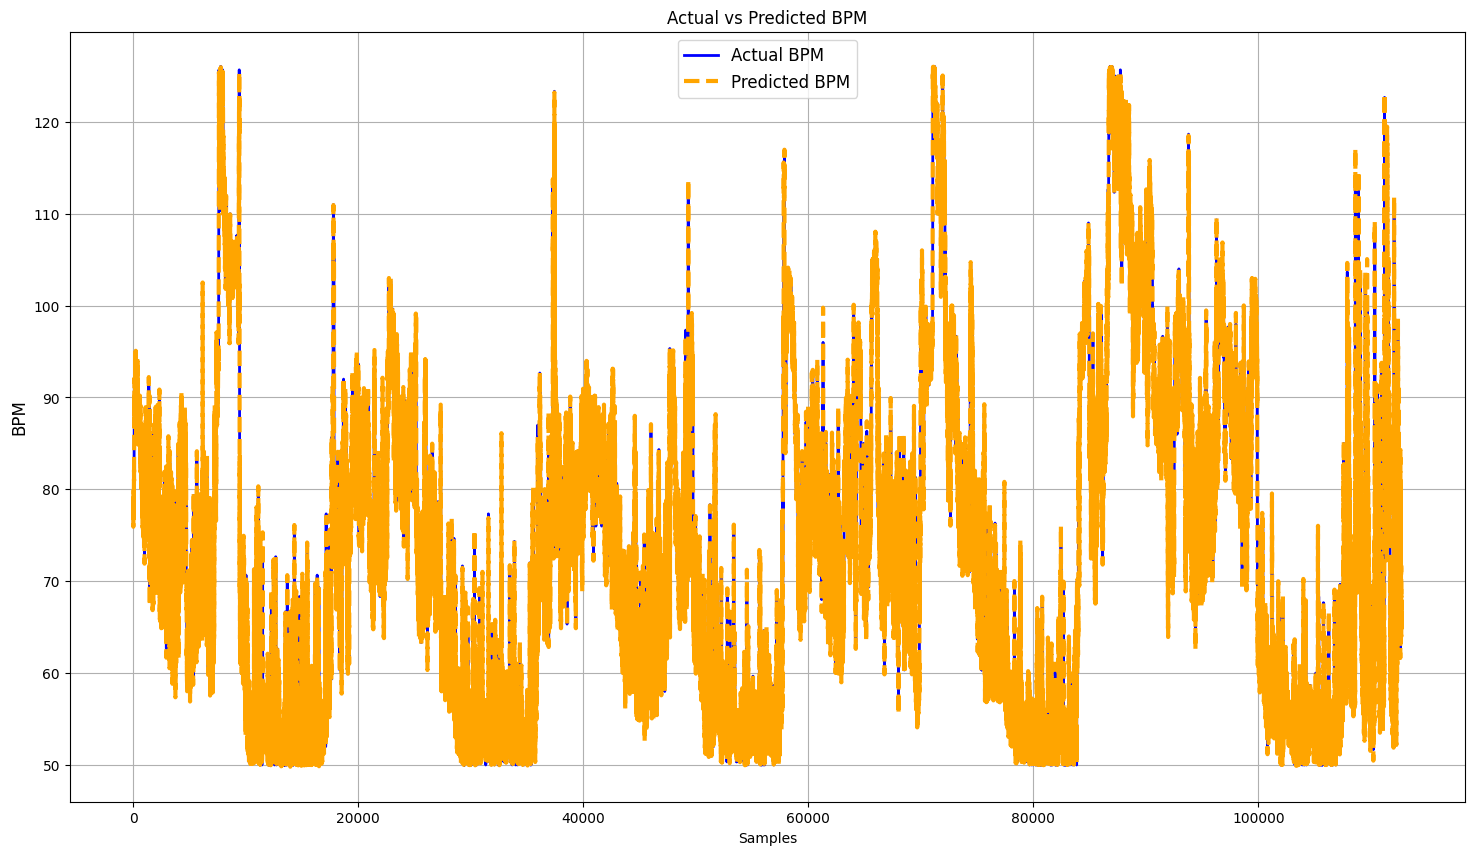

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from scipy import stats
from keras_tuner import RandomSearch

class HeartRateModel:
    def __init__(self):
        self.model = None
        self.scaler = MinMaxScaler(feature_range=(-1, 1))  # MinMaxScaler for normalization

    # Function to build the model with hyperparameters
    def build_model(self, hp, input_shape):
        model = Sequential()
        model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=256, step=32),
                       return_sequences=True, input_shape=input_shape))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

        model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=256, step=32)))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))

        model.add(Dense(1))
        # Compile the model with metrics that include 'mean_squared_error'
        model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                      loss='mean_squared_error',
                      metrics=['mean_squared_error', 'mean_absolute_error'])
        return model

    # Function to train the model
    def train_model(self, X_train, y_train, epochs=15, batch_size=32):
        """
        Train the LSTM model.
        """
        callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
        history = self.model.fit(X_train, y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 validation_split=0.2,
                                 callbacks=callbacks)
        print("Model training completed.")
        return history

    # Function to evaluate the model
    def evaluate_model(self, X_test, y_test, scaler, num_samples=None):
        """
        Evaluate the model and print accuracy metrics.
        Plot actual vs predicted BPM with enhanced clarity.
        """
        # Predict
        predictions = self.model.predict(X_test)

        # Inverse transform to get actual bpm values
        predictions = scaler.inverse_transform(predictions)
        y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Calculate metrics
        mse = mean_squared_error(y_test_actual, predictions)
        mae = mean_absolute_error(y_test_actual, predictions)
        print(f"Model Evaluation Metrics:\nMSE: {mse:.4f}\nMAE: {mae:.4f}")

        # Determine the number of samples to plot
        if num_samples is None or num_samples > len(y_test_actual):
            num_samples = len(y_test_actual)

        # Plot Actual vs Predicted
        plt.figure(figsize=(18, 10))
        plt.plot(y_test_actual[:num_samples], label='Actual BPM', color='blue', linewidth=2)
        plt.plot(predictions[:num_samples], label='Predicted BPM', color='orange', linestyle='--', linewidth=3)
        plt.title('Actual vs Predicted BPM', fontsize=12)
        plt.xlabel('Samples', fontsize=10)
        plt.ylabel('BPM', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.show()

    # Data Cleaning and Preprocessing Functions
    def load_data(self, csv_file_path):
        """
        Load data from CSV and clean it.
        """
        df = pd.read_csv(csv_file_path)

        # Combine date and time columns into dateTime
        df['dateTime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

        return df

    def filter_by_bpm(self, df, bpm_threshold=50):
        """
        Filter the dataset based on a minimum bpm value.
        """
        df = df[df['bpm'] >= bpm_threshold].reset_index(drop=True)
        return df

    def sort_data(self, df):
        """
        Sort the data by dateTime.
        """
        df = df.sort_values('dateTime').reset_index(drop=True)
        return df

    def remove_outliers(self, df, z_threshold=3):
        """
        Remove outliers using Z-score.
        """
        df['z_score'] = np.abs(stats.zscore(df['bpm']))
        df = df[df['z_score'] < z_threshold].reset_index(drop=True)
        df.drop('z_score', axis=1, inplace=True)
        return df

    def remove_noise(self, df, window_size=3):
        """
        Apply rolling window to smooth bpm data.
        """
        df['bpm'] = df['bpm'].rolling(window=window_size, center=True).mean()
        df['bpm'].fillna(method='bfill', inplace=True)
        df['bpm'].fillna(method='ffill', inplace=True)
        return df

    def normalize_bpm(self, df):
        """
        Normalize the bpm values using MinMaxScaler.
        """
        df['bpm_normalized'] = self.scaler.fit_transform(df['bpm'].values.reshape(-1, 1))
        return df

    # Function to prepare LSTM data
    def prepare_lstm_data(self, df, sequence_length=10):
        """
        Prepare data for LSTM model training using normalized bpm.
        """
        data = df['bpm_normalized'].values

        X, y = [], []
        for i in range(sequence_length, len(data)):
            X.append(data[i-sequence_length:i])
            y.append(data[i])

        X, y = np.array(X), np.array(y)

        # Reshape X for LSTM [samples, time steps, features]
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        # Splitting data into training and testing sets
        split_index = int(len(X) * 0.8)
        X_train, X_test = X[:split_index], X[split_index:]
        y_train, y_test = y[:split_index], y[split_index:]
        return X_train, X_test, y_train, y_test

# Usage Example
if __name__ == "__main__":
    # Instantiate the model class
    hr_model = HeartRateModel()

    # Load, clean, and preprocess the data
    csv_path = 'E:\\chatbot-01\\datasets\\hr\\heart_rate_data.csv'
    df_cleaned = hr_model.load_data(csv_path)

    # Apply data cleaning steps
    df_cleaned = hr_model.filter_by_bpm(df_cleaned)
    df_cleaned = hr_model.sort_data(df_cleaned)
    df_cleaned = hr_model.remove_outliers(df_cleaned)
    df_cleaned = hr_model.remove_noise(df_cleaned)
    df_cleaned = hr_model.normalize_bpm(df_cleaned)  # Normalize bpm

    # Prepare the data for LSTM model
    X_train, X_test, y_train, y_test = hr_model.prepare_lstm_data(df_cleaned)

    # Perform RandomSearch for hyperparameter tuning
    tuner = RandomSearch(lambda hp: hr_model.build_model(hp, input_shape=(X_train.shape[1], 1)),
                         objective='val_mean_squared_error', max_trials=5, executions_per_trial=1)
    
    # Start the hyperparameter search
    tuner.search(X_train, y_train, epochs=15, validation_split=0.2)

    # Retrieve the best model
    hr_model.model = tuner.get_best_models(num_models=1)[0]

    # Evaluate the best model
    hr_model.evaluate_model(X_test, y_test, hr_model.scaler)


Trial 5 Complete [00h 56m 36s]
val_mean_squared_error: 0.004511124920099974

Best val_mean_squared_error So Far: 0.00449801841750741
Total elapsed time: 03h 25m 13s


e:\chatbot-01\python-backend\venv\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3522/3522 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step
Model Evaluation Metrics:
MSE: 8.0357
MAE: 1.8171


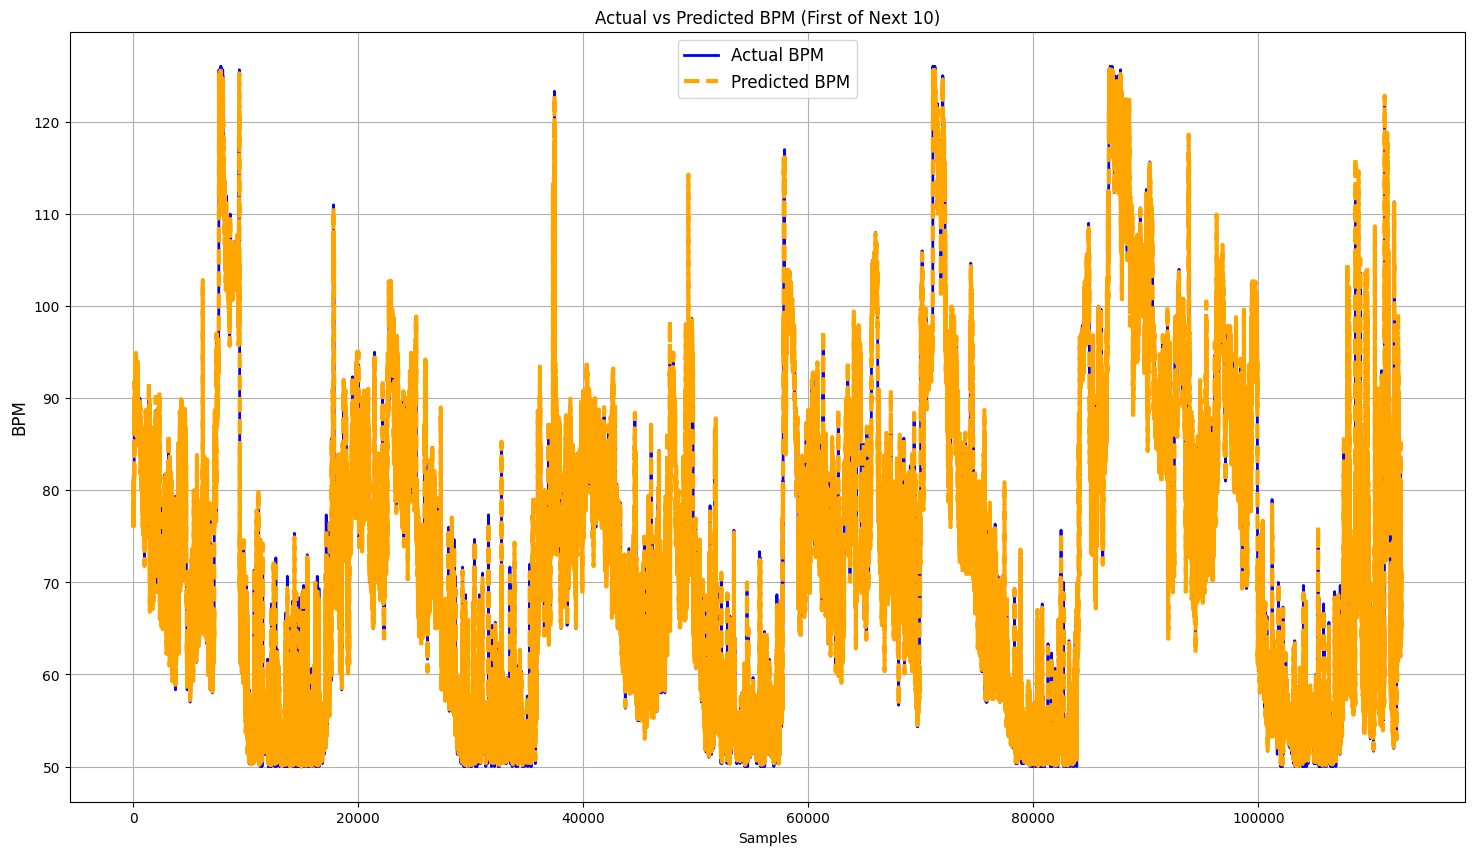

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from scipy import stats
from keras_tuner import RandomSearch

class HeartRateModel:
    def __init__(self):
        self.model = None
        self.scaler = MinMaxScaler(feature_range=(-1, 1))  # MinMaxScaler for normalization

    # Function to build the model with hyperparameters
    def build_model(self, hp, input_shape):
        model = Sequential()
        model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=256, step=32),
                       return_sequences=True, input_shape=input_shape))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

        model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=256, step=32),
                       return_sequences=False))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))

        # Output layer to predict 10 BPM values
        model.add(Dense(10))
        
        # Compile the model
        model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                      loss='mean_squared_error',
                      metrics=['mean_squared_error', 'mean_absolute_error'])
        return model

    # Function to train the model
    def train_model(self, X_train, y_train, epochs=15, batch_size=32):
        """
        Train the LSTM model.
        """
        callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
        history = self.model.fit(X_train, y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 validation_split=0.2,
                                 callbacks=callbacks)
        print("Model training completed.")
        return history

    # Function to evaluate the model
    def evaluate_model(self, X_test, y_test, scaler, num_samples=None):
        """
        Evaluate the model and print accuracy metrics.
        Plot actual vs predicted BPM with enhanced clarity.
        """
        # Predict
        predictions = self.model.predict(X_test)

        # Inverse transform to get actual bpm values
        predictions = scaler.inverse_transform(predictions)
        y_test_actual = scaler.inverse_transform(y_test)

        # Calculate metrics for all predicted values
        mse = mean_squared_error(y_test_actual, predictions)
        mae = mean_absolute_error(y_test_actual, predictions)
        print(f"Model Evaluation Metrics:\nMSE: {mse:.4f}\nMAE: {mae:.4f}")

        # Determine the number of samples to plot
        if num_samples is None or num_samples > len(y_test_actual):
            num_samples = len(y_test_actual)

        # Plot Actual vs Predicted for the first value in the sequence
        plt.figure(figsize=(18, 10))
        plt.plot(y_test_actual[:num_samples, 0], label='Actual BPM', color='blue', linewidth=2)
        plt.plot(predictions[:num_samples, 0], label='Predicted BPM', color='orange', linestyle='--', linewidth=3)
        plt.title('Actual vs Predicted BPM (First of Next 10)', fontsize=12)
        plt.xlabel('Samples', fontsize=10)
        plt.ylabel('BPM', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.show()

    # Data Cleaning and Preprocessing Functions
    def load_data(self, csv_file_path):
        """
        Load data from CSV and clean it.
        """
        df = pd.read_csv(csv_file_path)
        df['dateTime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
        return df

    def filter_by_bpm(self, df, bpm_threshold=50):
        df = df[df['bpm'] >= bpm_threshold].reset_index(drop=True)
        return df

    def sort_data(self, df):
        df = df.sort_values('dateTime').reset_index(drop=True)
        return df

    def remove_outliers(self, df, z_threshold=3):
        df['z_score'] = np.abs(stats.zscore(df['bpm']))
        df = df[df['z_score'] < z_threshold].reset_index(drop=True)
        df.drop('z_score', axis=1, inplace=True)
        return df

    def remove_noise(self, df, window_size=3):
        df['bpm'] = df['bpm'].rolling(window=window_size, center=True).mean()
        df['bpm'].fillna(method='bfill', inplace=True)
        df['bpm'].fillna(method='ffill', inplace=True)
        return df

    def normalize_bpm(self, df):
        df['bpm_normalized'] = self.scaler.fit_transform(df['bpm'].values.reshape(-1, 1))
        return df

    # Function to prepare LSTM data for predicting next 10 BPM values
    def prepare_lstm_data(self, df, sequence_length=10, predict_length=10):
        data = df['bpm_normalized'].values

        X, y = [], []
        for i in range(sequence_length, len(data) - predict_length):
            X.append(data[i-sequence_length:i])
            y.append(data[i:i+predict_length])  # Adjusted to predict the next 10 values

        X, y = np.array(X), np.array(y)

        # Reshape X for LSTM [samples, time steps, features]
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        # Splitting data into training and testing sets
        split_index = int(len(X) * 0.8)
        X_train, X_test = X[:split_index], X[split_index:]
        y_train, y_test = y[:split_index], y[split_index:]
        
        # Reshape y to match (batch_size, 10)
        y_train = y_train.reshape(-1, 10)
        y_test = y_test.reshape(-1, 10)

        return X_train, X_test, y_train, y_test

# Usage Example
if __name__ == "__main__":
    # Instantiate the model class
    hr_model = HeartRateModel()

    # Load, clean, and preprocess the data
    csv_path = 'E:\\chatbot-01\\datasets\\hr\\heart_rate_data.csv'
    df_cleaned = hr_model.load_data(csv_path)

    # Apply data cleaning steps
    df_cleaned = hr_model.filter_by_bpm(df_cleaned)
    df_cleaned = hr_model.sort_data(df_cleaned)
    df_cleaned = hr_model.remove_outliers(df_cleaned)
    df_cleaned = hr_model.remove_noise(df_cleaned)
    df_cleaned = hr_model.normalize_bpm(df_cleaned)  # Normalize bpm

    # Prepare the data for LSTM model
    X_train, X_test, y_train, y_test = hr_model.prepare_lstm_data(df_cleaned)

    # Perform RandomSearch for hyperparameter tuning
    tuner = RandomSearch(
    lambda hp: hr_model.build_model(hp, input_shape=(X_train.shape[1], 1)),
    objective='val_mean_squared_error',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='hr_tuning'
   )
    
    # Start the hyperparameter search
    tuner.search(X_train, y_train, epochs=15, validation_split=0.2)

    # Retrieve the best model
    best_models = tuner.get_best_models(num_models=1)
    if best_models:
     hr_model.model = best_models[0]
    else:
     print("No best models found.")

    # Evaluate the best model if it's found
    if hr_model.model:
     hr_model.evaluate_model(X_test, y_test, hr_model.scaler)
    else:
     print("Model evaluation could not be performed.")
